Load the data.

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dmml_project import PROJECT_ROOT
from dmml_project.models.hyperparameters import HYPERPARAMETERS

search_results = {}
beautiful_names = {
    "decision_tree": "Decision Tree",
    "random_forest": "Random Forest",
    "neural_network": "Neural Network",
}
for model_kind in HYPERPARAMETERS.keys():
    path = f"{PROJECT_ROOT}/data/{model_kind}_search.json"
    try:
        with open(path, 'r') as f:
            data = json.load(f)
            search_results[model_kind] = data["search_results"]
    except FileNotFoundError:
        print(f"Skipping {model_kind} as no search results were found")


Skipping neural_network as no search results were found


Create a dataframe for the violin plot.

In [2]:

violin_plot_data = pd.DataFrame(columns=["accuracy_mean", "accuracy_std", "model_kind"])
for model_kind, results in search_results.items():
    for result in results:
        accuracies = np.array(result[1])
        mean = np.mean(accuracies)
        std = np.std(accuracies)
        violin_plot_data.loc[len(violin_plot_data)] = [mean, std, beautiful_names[model_kind]]
        

Display the plot.

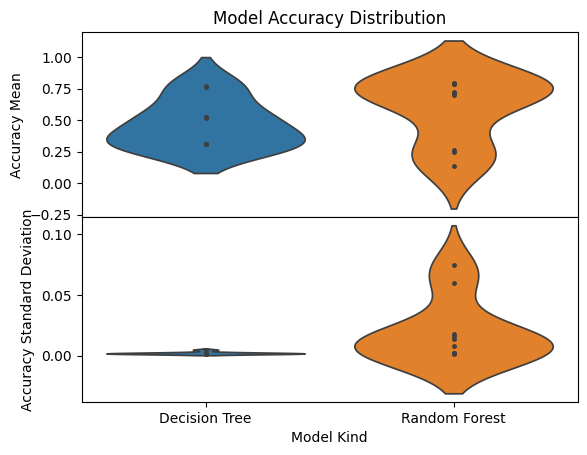

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})
axs[0].set_title("Model Accuracy Distribution")
sns.violinplot(data=violin_plot_data, x="model_kind", y="accuracy_mean", hue="model_kind", inner="points", ax=axs[0])
axs[0].set_ylabel("Accuracy Mean")
sns.violinplot(data=violin_plot_data, x="model_kind", y="accuracy_std", hue="model_kind", inner="points", ax=axs[1])
axs[1].set_xlabel("Model Kind")
axs[1].set_ylabel("Accuracy Standard Deviation")
plt.show()

Calculate the best model for each model type.

In [4]:
best_results = {}
for model_kind, results in search_results.items():
    best_results[model_kind] = {
        "accuracy": 0,
        "accuracy_distribution": None,
        "params": None
    }
    for result in results:
        accuracies = np.array(result[1])
        mean = np.mean(accuracies)
        if mean > best_results[model_kind]["accuracy"]:
            best_results[model_kind]["accuracy"] = mean
            best_results[model_kind]["accuracy_distribution"] = accuracies
            best_results[model_kind]["params"] = result[0]
            

Print the best model for each model type.

In [6]:
for model_kind, result in best_results.items():
    print(f"Best {beautiful_names[model_kind]} accuracy: {result['accuracy']*100:.2f}%")
    print(f"Best {beautiful_names[model_kind]} hyperparameters: {result['params']}")

Best Decision Tree accuracy: 76.83%
Best Decision Tree hyperparameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': None, 'min_impurity_decrease': 1e-06, 'class_weight': 'balanced'}
Best Random Forest accuracy: 79.71%
Best Random Forest hyperparameters: {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'min_impurity_decrease': 1e-06, 'n_jobs': -1, 'class_weight': 'balanced'}
